In [4]:
"""
The purpose of this notebook is to plot root tree variables with uproot and matplotlib.
"""

'\nThe purpose of this notebook is to plot root tree variables with uproot and matplotlib.\n'

In [5]:
%matplotlib inline
import uproot 
import os 
import numpy as np
from matplotlib import pyplot as plt 
from ROOT import TLorentzVector
import awkward as ak 

Welcome to JupyROOT 6.24/00


In [6]:
##-- Bimodal statistical uncertainty 
def bimod_unc(a, b):
    ratio = a / b
    uncertainty = ratio * np.sqrt((1/a) + (1/b))
    return uncertainty

##-- CMS header 
def Add_CMS_Header(plt, isWide, ax, upperRightText):
    ##-- Upper left plot text
    ##-- CMS 
    plt.text(
        # 0.05, 0.9, u"CMS $\it{Preliminary}$",
        0., 1., u"CMS ",
        fontsize=20, fontweight='bold',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
    )
    
    if(isWide):
        prelim_x = 0.08
    else:
#         prelim_x = 0.08
        prelim_x = 0.135
    
    ##-- Preliminary 
    plt.text(
#         prelim_x, 0.998, u"$\it{Simulation}$ $\it{Preliminary}$",
        prelim_x, 0.998, u"$\it{Preliminary}$",
        fontsize=18,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
    )    

    ##-- Lumi 
    plt.text(
#         1., 1., r"%s fb$^{-1}$ (13 TeV)"%(lumi),
#         1., 1., "(13 TeV)",
#         1., 1., "(14 TeV)",
        1., 1., upperRightText,
        fontsize=16, horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )  
    
    
def DeltaR(eta_0_, eta_1_, phi_0_, phi_1_):
    dEta = np.subtract(eta_0_, eta_1_)
    dPhi = np.subtract(phi_0_, phi_1_)
    dEta_squared = np.square(dEta)
    dPhi_squared = np.square(dPhi)
    dR = np.sqrt(np.add(dEta_squared, dPhi_squared))      
    return dR

def InvMass(pt_0_, eta_0_, phi_0_, mass_0_, pt_1_, eta_1_, phi_1_, mass_1_):
    v1 = TLorentzVector() 
    v1.SetPtEtaPhiM(pt_0_, eta_0_, phi_0_, mass_0_) 
    
    v2 = TLorentzVector()
    v2.SetPtEtaPhiM(pt_1_, eta_1_, phi_1_, mass_1_)
    
    TwoBodyVector = v1 + v2 
    TwoBodyMass = TwoBodyVector.M()
    
    return TwoBodyMass

In [7]:
##-- All runs 
runs = [343193, 343196, 343198, 343200, 343202, 343204]

##-- Compare ODD vs. EVEN + ODD 
# runs = [343196, 343198]

##-- Compare ODD peak finder ON / OFF 
# runs = [343202, 343204]

# One 
# runs = [343193]

file_paths = []

# CRUZET data 
d = "/eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000/"
file_paths = ["%s/Run_%s.root"%(d, run) for run in runs]

# 2018 beam splashes
# runs = [313133]
# d = "/eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/2018BeamSplashes/ETTAnalyzer_Output/"
# file_paths = ["%s/Beamsplash_Run%s_ETTAnalyzer_output.root"%(d, run) for run in runs]

# 2016 beam splashes
# runs = [267928]
# d = "/eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/2016BeamSplashes/splash2016/ETTAnalyzer_output/"
# file_paths = ["%s/Beamsplash_Run%s_ETTAnalyzer_output.root"%(d, run) for run in runs]

tree_path = "ETTAnalyzerTree"

In [10]:
BinDict = {
    "N_goodElectrons" : [0, 5, 5], 
    "N_goodMuons" : [0, 5, 5], 
    "N_allElectrons" : [0, 5, 5], 
    "N_allMuons" : [0, 5, 5],  
    "N_allLeptons" : [0, 10, 10],
    "N_goodLeptons" : [0, 3, 3],
    "N_allJets" : [0, 20, 20],
    "N_goodJets" : [0, 10, 10],
    "GEN_Lepton_0_pt" : [0, 400, 40],
    "GEN_Quark_0_pt" : [0, 400, 40],
    "GEN_Quark_1_pt" : [0, 400, 40],
    "GEN_Lepton_0_eta" : [-3, 3, 40],
    "GEN_Quark_0_eta" : [-3, 3, 40],
    "GEN_Quark_1_eta" : [-3, 3, 40],
    "GEN_Lepton_0_phi" : [-3, 3, 40],
    "GEN_Quark_0_phi" : [-3, 3, 40],
    "GEN_Quark_1_phi" : [-3, 3, 40],
    "GEN_Lepton_0_pdgId" : [-20, 7, 60],
    "GEN_DR_Lepton_Quark0" : [0, 7, 60],
    "GEN_DR_Lepton_Quark1" : [0, 7, 60],
    "GEN_Leading_W_mass_over_pt" : [0, 10, 80],
    "GEN_Subleading_W_mass_over_pt" : [0, 10, 80],
    "GEN_Leading_H_mass_over_pt" : [0, 10, 80],
    "GEN_Subleading_H_mass_over_pt" : [0, 10, 80],
    "npuVertices" : [140, 260, 40],
    "vtx_pt2" : [0, 10000, 40],
    "mgg" : [115, 135, 80],
    "mjj" : [0, 90, 90],
    # ETTAnalyzer variables 
#     "maxRecHitEnergy" : [0, 2, 100],
    "maxRecHitEnergy" : [0, 100, 100],
    "oneMinusEmuOverRealTP" : [-5, 3, 16],
    "ttFlag" : [0, 5, 5],
    "rawTPEmulttFlag3" : [0, 5, 5],
#     "twrADC" : (0.0, 1.0, 8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0, 80.0, 88.0, 96.0, 104.0, 112.0, 150.0, 256.0),
#     "twrEmul3ADC" : (0.0, 1.0, 8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0, 80.0, 88.0, 96.0, 104.0, 112.0, 150.0, 256.0),
    "twrADC" : (1.0, 8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0, 80.0, 88.0, 96.0, 104.0, 112.0, 150.0, 256.0),
    "twrEmul3ADC" : (1.0, 8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0, 80.0, 88.0, 96.0, 104.0, 112.0, 150.0, 256.0),    
    
    "ieta" : [-20, 20, 40],
    "iphi" : [0, 80, 80],
    "TCCid" : [-100, 100, 200],
#     "time" : [-25, 25, 100]
    "time" : [-25, 25, 50]
}

runLabelDict = {
    "343193" : "Run 2",
    "343196" : "ODD output, sensible",
    "343198" : "EVEN+ODD",
    "343200" : "ODD output, random",
    "343202" : "EVEN+ODD,random,ODD PF ON",
    "343204" : "EVEN+ODD,random,ODD PF OFF",
    "313133" : "Run 313133",
    "267928" : "Run 267928"
}

Plotting: ttFlag
Variable: ttFlag
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343193.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343196.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343198.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343200.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343202.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2

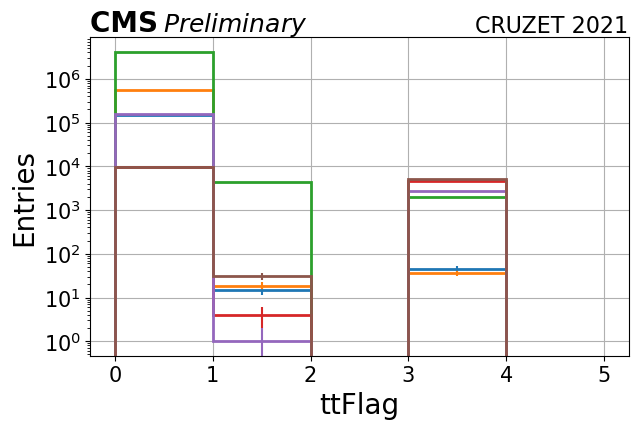

Plotting: time
Variable: time
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343193.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343196.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343198.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343200.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_CRUZET/ETTAnalyzer_CMSSW_11_3_0_CRUZET_2021/210814_140022/0000//Run_343202.root
file: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/Trigger/DoubleWeights/MinimumBias_July_2021_

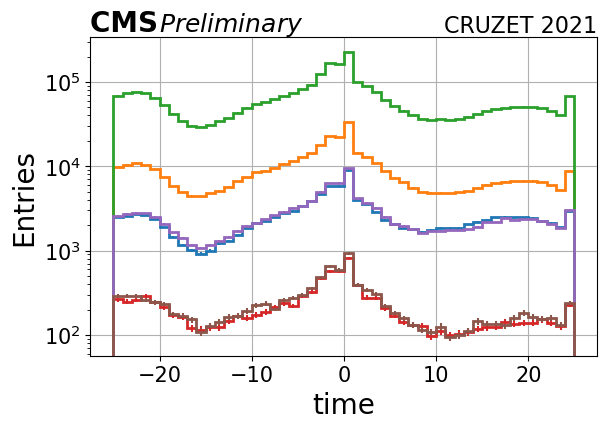

DONE


In [11]:
# Plot 
TTF_clean = 0 # Remove TPs with TTF flag == 4 
flatten = 1
log = 1
normalize = 0
legend = 0

# All ETT variables:
"""
['runNb', 'evtNb', 'bxNb', 'orbitNb', 'lumiBlock', 'timeStamp', 'nbOfTowers', 
 'ieta', 'iphi', 'rawTPEmul3', 'rawTPEmulttFlag3', 'rawTPEmulsFGVB3', 'crystNb',
 'maxRecHitEnergy', 'sevlv', 'time', 'spike', 'twrADC', 'sFGVB', 'ttFlag', 'TCCid', 
 'TowerInTCC', 'strip', 'twrEmul3ADC']
"""

variables = [
#     "twrADC",
#     "twrEmul3ADC",
#     "oneMinusEmuOverRealTP",
#     "maxRecHitEnergy",
#     "ieta",
    "ttFlag",
#     "rawTPEmulttFlag3",
#     "iphi",
#     "TCCid",
    "time"
]

isWide = 0 
zoomx = 0

specialVariables = {
    "N_allLeptons" : ['add', 'N_allElectrons', "N_allMuons"],
    "N_goodLeptons" : ['add', 'N_goodElectrons', "N_goodMuons"],
    "GEN_DR_Lepton_Quark0" : ['dR', 'GEN_Lepton_0', 'GEN_Quark_0'],
    "GEN_DR_Lepton_Quark1" : ['dR', 'GEN_Lepton_0', 'GEN_Quark_1'],
    "GEN_Leading_W_mass_over_pt" : ['divide', 'Leading_GEN_W_M', "Leading_GEN_W_pt"],
    "GEN_Subleading_W_mass_over_pt" : ['divide', 'Subleading_GEN_W_M', "Subleading_GEN_W_pt"],
    "GEN_Leading_H_mass_over_pt" : ['divide', 'Leading_GEN_Higgs_M', "Leading_GEN_Higgs_pt"],
    "GEN_Subleading_H_mass_over_pt" : ['divide', 'Subleading_GEN_Higgs_M', "Subleading_GEN_Higgs_pt"],    
    "mgg" : ['invMass', "gamma", "gamma"],
    "mjj" : ['invMass', "jetpuppi", "jetpuppi"],
    "oneMinusEmuOverRealTP" : ['oneMinusEmuOverRealTP', "twrEmul3ADC", "twrADC"]
}

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
lineStyles = ["solid"] * 6 

for v in variables:
    print("Plotting:",v)
    fig, ax = plt.subplots()
    fig.set_dpi(100)
    fig.set_size_inches(6, 4)
    print("Variable:",v)
    if(len(BinDict[v]) != 3):
        bins = BinDict[v]
        xmin = bins[0]
        xmax = bins[-1]
        nbins = len(bins)
    else:
        xmin, xmax, nbins = BinDict[v]
        bins = np.linspace(xmin, xmax, nbins + 1)  

    for f_i, file_path in enumerate(file_paths):
        runNumber = file_path.split('/')[-1].split('_')[1]
        runNumber = runNumber.replace(".root", "")
        runNumber = runNumber.replace("Run", "")
        print("file:",file_path)
        color = colors[f_i]
        lineStyle = lineStyles[f_i]
        u_f = uproot.open(file_path)
        tree = u_f[tree_path]
        vals = []
        weights = []        

        ##-- Special vars which need adding, multiply, etc. of existing branches 
        if(v in specialVariables.keys()):
            operation, v1_name, v2_name = specialVariables[v]

            if(operation == 'dR'):
                exec("eta_0 =    u_f[tree_path]['%s_eta'].array()"%(v1_name))
                exec("eta_1 =    u_f[tree_path]['%s_eta'].array()"%(v2_name))
                exec("phi_0 =    u_f[tree_path]['%s_phi'].array()"%(v1_name))
                exec("phi_1 =    u_f[tree_path]['%s_phi'].array()"%(v2_name))

                variable_values = DeltaR(eta_0, eta_1, phi_0, phi_1)

            elif(operation == 'invMass'):
                ##-- Need four vector values for each 
                exec("MASK = tree['%s_size'].array() > 2"%(v1_name))
                exec("pt_0 = tree['%s_pt'].array()[MASK][:,0]"%(v1_name)) ##-- Leading object
                exec("eta_0 = tree['%s_eta'].array()[MASK][:,0]"%(v1_name)) ##-- Leading object
                exec("phi_0 = tree['%s_phi'].array()[MASK][:,0]"%(v1_name)) ##-- Leading object
                exec("mass_0 = tree['%s_mass'].array()[MASK][:,0]"%(v1_name)) ##-- Leading object

                exec("pt_1 = tree['%s_pt'].array()[MASK][:,1]"%(v2_name)) ##-- Subleading object 
                exec("eta_1 = tree['%s_eta'].array()[MASK][:,1]"%(v2_name))
                exec("phi_1 = tree['%s_phi'].array()[MASK][:,1]"%(v2_name)) 
                exec("mass_1 = tree['%s_mass'].array()[MASK][:,1]"%(v2_name))            

                map_vals = map(InvMass, pt_0, eta_0, phi_0, mass_0, pt_1, eta_1, phi_1, mass_1)
                variable_values = list(map_vals)

            elif(operation == 'oneMinusEmuOverRealTP'):
                v1_values = ak.flatten(u_f[tree_path][v1_name].array())
                v2_values = ak.flatten(u_f[tree_path][v2_name].array())
                variable_values = np.divide(v1_values, v2_values)
                variable_values = np.subtract(np.array([1] * len(v1_values)), variable_values)

            else:
                v1_values = u_f[tree_path][v1_name].array()
                v2_values = u_f[tree_path][v2_name].array()
                exec("variable_values = np.%s(v1_values, v2_values)"%(operation))
        else:
            if(v == "vtx_pt2"):
                variable_values = u_f[tree_path][v].array()[:,0] ##-- 0th vertex 
                
            # Not a special variable or operation 
            else:
                variable_values = u_f[tree_path][v].array()
                if(TTF_clean):
                    TTF_values = u_f[tree_path]["ttFlag"].array()
                    
                if(flatten): 
                    variable_values = ak.flatten(variable_values)
                    if(TTF_clean):
                        TTF_values = ak.flatten(TTF_values)
                        
                if(TTF_clean):
                    TTF4_Mask = [val != 4 for val in TTF_values]
                    MASK = np.logical_and(True, TTF4_Mask)
                    variable_values = variable_values[MASK]

        ##-- Update variable values with tag 
        vals = np.append(vals, np.array(variable_values))
    #     weights = np.append(weights, np.array(MC_weights))

        ##-- Make histogram 
    #     binVals, edges = np.histogram(vals, bins = bins, weights = weights) ##-- Make numpy histogram to get histogram height values in order to avoid drawing on pyplot artist 
    #     binVals_noweights, edges_noweights = np.histogram(vals, bins = bins) ##-- Make numpy histogram to get histogram height values in order to avoid drawing on pyplot artist 
        binVals, edges = np.histogram(vals, bins = bins) ##-- Make numpy histogram to get histogram height values in order to avoid drawing on pyplot artist 
        binWidth = (xmax - xmin) / nbins
        binCenters = [ (float(a) + float(edges[i+1])) / 2 for i, a in enumerate(edges[:-1])]  
        
        ##-- Stat uncertainty - poissonian per bin then scale with normalization
        rel_yerrors = [0 if N == 0 else (np.sqrt(N) / N) for N in binVals] #-- delta(y)

        ##-- Normalize to unity so that each bin is a probability 
        if(normalize):
            hist_sum = np.sum(binVals)
            binVals = binVals / hist_sum
            normed_yerrors = np.multiply(binVals, rel_yerrors)
            yerrors = normed_yerrors 
            
        else:
            yerrors = np.multiply(binVals, rel_yerrors)

        runLabel = runLabelDict[runNumber]
        plt.hist(bins[:-1], 
                 weights = binVals, 
                 bins = bins, 
                 histtype = 'step', 
                 linewidth=2,
                 color = color,
                 linestyle = (lineStyle),
                 label = runLabel
                )
        plt.errorbar(x = binCenters, 
                     y = binVals, 
                     yerr = yerrors, 
                     color = color,
                     fmt = " ", # Removes the line 
    #                      zorder = 2
                    ) 
        
    if(int(runNumber) > 340000):
        upperRightText = "CRUZET 2021"
    elif(int(runNumber) < 300000):
        upperRightText = "2016 Beam Splash"
    else:
        upperRightText = "2018 Beam Splash"
        
    Add_CMS_Header(plt, isWide, ax, upperRightText)
    fig.tight_layout()
    plt.xlabel(v, fontsize = 20)
    if(normalize):
        yLabel = "Probability"
    else:
        yLabel = "Entries"
    plt.ylabel(yLabel, fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15) 
    plt.grid()
    if("DR" in v):
        ax.axvline(0.4, linestyle = 'solid', color = 'black') ##-- line at 0.4 because of 0.4 selection on dR for jets, leptons and photons. axvlines is by default from min to max 
        plt.text(
            0.12, 0.8, r"$\Delta$R $=$ 0.4",
            fontsize=25,
            horizontalalignment='left',
            verticalalignment='bottom',
            transform=ax.transAxes
        )  
    if(log):
        plt.yscale('log')
    if(zoomx):
        plt.xlim(0, 10)
    if(legend): plt.legend(loc = 'best', fontsize = 15)
    plt.show()
    plt.close()
    
print("DONE")